In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("preprocess_complete.csv")

In [58]:
data.head()

,url,book_id,title,award_count,author,avg_rating,num_reviews,num_ratings,num_pages,original_publish_year,series,genres,awards,place
0,https://www.goodreads.com/book/show/2767052-th...,2767052.0,The Hunger Games,41,Suzanne Collins,4.32,6684784.0,6684784.0,374.0,2008.0,True,"Young Adult, Fiction, Science Fiction, Dystopi...",Locus Award Nominee for Best Young Adult Book ...,"District 12, Panem, Capitol, Panem, Panem"
1,https://www.goodreads.com/book/show/2.Harry_Po...,2.0,Harry Potter and the Order of the Phoenix,9,J.K. Rowling,4.50,2653089.0,2653089.0,870.0,2003.0,True,"Fantasy, Young Adult, Fiction, Fantasy, Magic,...",Bram Stoker Award for Works for Young Readers ...,"Hogwarts School of Witchcraft and Wizardry, Lo..."
2,https://www.goodreads.com/book/show/2657.To_Ki...,2657.0,To Kill a Mockingbird,4,Harper Lee,4.28,4748049.0,4748049.0,324.0,1960.0,False,"Classics, Fiction, Historical, Historical Fict...","Pulitzer Prize for Fiction (1961), Audie Award...","Maycomb, Alabama, Alabama"
3,https://www.goodreads.com/book/show/1885.Pride...,1885.0,Pride and Prejudice,0,Jane Austen,4.27,3185657.0,3185657.0,279.0,1813.0,False,"Classics, Fiction, Romance, Historical, Histor...",NaN,"United Kingdom, Derbyshire, England, England, ..."
4,https://www.goodreads.com/book/show/41865.Twil...,41865.0,Twilight,25,Stephenie Meyer,3.61,5205804.0,5205804.0,501.0,2005.0,True,"Young Adult, Fantasy, Romance, Fiction, Parano...","Georgia Peach Book Award (2007), Buxtehuder Bu...","Forks, Washington, Phoenix, Arizona, Washingto..."


In [59]:
#The most reviewed books 
mostly_reviewed = df.sort_values(by='num_reviews', ascending=False) # Sorting by number of reviews
mostly_reviewed = mostly_reviewed[['title','num_reviews']] # Selecting just the columns we want
mostly_reviewed = mostly_reviewed.head(15) # Choosing only the top 10 books

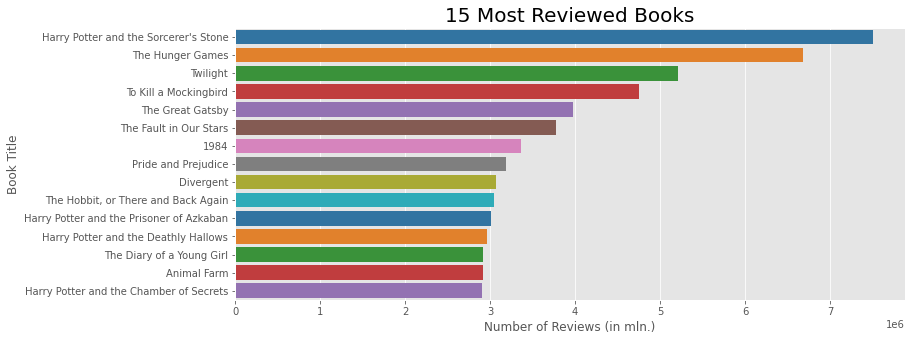

In [60]:
# The 15 mostly reviewed books
plt.figure(figsize=(12,5))
sns.barplot(y='title', x='num_reviews', data = mostly_reviewed, palette="tab10")
plt.title('15 Most Reviewed Books', fontsize='20')
plt.xlabel('Number of Reviews (in mln.)')
plt.ylabel('Book Title')

plt.show()

In [61]:
pip install sweetviz

  Using cached sweetviz-2.1.0-py3-none-any.whl (15.1 MB)
Note: you may need to restart the kernel to use updated packages.Collecting importlib-resources>=1.2.0
  Using cached importlib_resources-5.1.2-py3-none-any.whl (25 kB)



In [70]:
import sweetviz as sv

In [67]:
x=df.drop('title',axis=1)
y=df['title']

In [73]:
analyze_report = sv.analyze(df)
analyze_report.show_html('analyze.html', open_browser=False)


Report analyze.html was generated.
